In [1]:
"""operate in parent directory"""

import os
import sys


sys.path.insert(0, os.getcwd() + "/..")

In [2]:
"""Make trainer class that only plays one turn then quits"""

from typing import Any

from titans.ai import Game, Identity, Trainer


class OneTrainer(Trainer):
    """Trainer that only plays one turn each game"""
    def _init_game(
        self,
        player_kwargs: dict[str, Any] | dict[Identity, dict[str, Any]],
    ) -> Game:
        return Game(player_kwargs, turn_limit=1)

In [3]:
"""Time runs"""

from time import time


# function to time playing games
def time_play(
    num_games: int,
    parallel: bool,
) -> float:
    """Time playing games
    
    Parameters
    ----------
    num_games: int
        number of games to play
    parallel: bool
        whether to play in parallel
    """

    # initialize
    trainer = OneTrainer()

    # mock training to bypass requirements
    for strategy in trainer.strategies.values():
        strategy._scaler = None
        strategy._model_fitted = True

    # time playing games
    start_time = time()
    trainer._play_games(
        num_games=num_games,
        parallel=parallel,
    )
    return time() - start_time


# time various scenarios
elapsed = {
    parallel: {
        num_games: [
            time_play(
                num_games=num_games,
                parallel=parallel,
            ) / num_games
            for num_runs in range(10)
        ]
        for num_games in [1, 3, 10, 30, 100, 300, 1000]
    }
    for parallel in [True, False]
}

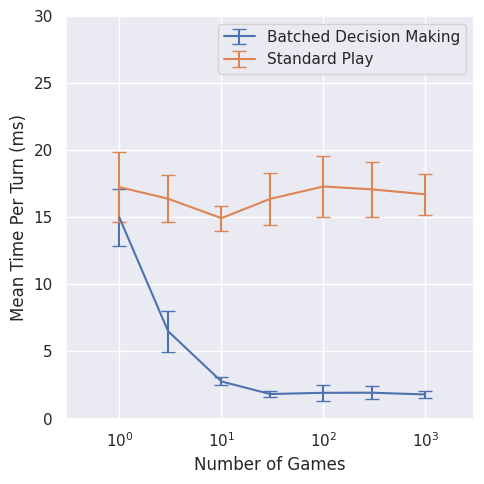

In [4]:
"""Plot results"""

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# make pretty
sns.set_theme()

# make figure
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# plot time per turn
for parallel, label in [
    (True, "Batched Decision Making"),
    (False, "Standard Play"),
]:

    # get quantities
    x = list(elapsed[parallel].keys())
    y = [
        np.mean(elapsed[parallel][num_games]) * 1000
        for num_games in elapsed[parallel].keys()
    ]
    err = [
        np.std(1000 * np.array(elapsed[parallel][num_games]))
        for num_games in elapsed[parallel].keys()
    ]

    # plot
    ax.errorbar(x, y, err, capsize=5, label=label)

# label figure
ax.set_xlim([.3, 3000])
ax.set_ylim([0, 30])
ax.set_xscale("log")
ax.set_xlabel("Number of Games")
ax.set_ylabel("Mean Time Per Turn (ms)")
ax.legend()

# show figure
fig.tight_layout()
plt.show()